#Import Libraries

In [ ]:
import pandas as pd
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Model preparation
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Graphical representation
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import plotly.graph_objects as go

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

#Dataset

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Time Series Decomposition


In [ ]:
# Resetting 'Month' column as index

data.set_index('Month', inplace=True)

In [ ]:
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
data.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

#Plotting graph as per Data

In [ ]:
# Index changed to date type

data.index = pd.to_datetime(data.index)

# Plot the data

fig = px.line(data, x=data.index, y='Passengers', labels=({'Passengers': 'Passengers', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18), title_text='Airline Passengers', width=800, title_x=0.5, height=400)

fig.show()

# Additive & Multiplicative Model


![image](https://static.javatpoint.com/tutorial/r/images/r-time-series-analysis2.png)

# Multiplicative Model

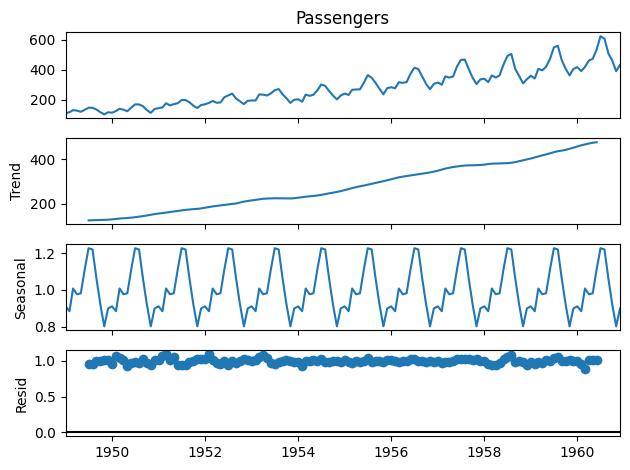

In [ ]:
# Plot the decomposition for multiplicative series

decomposition_plot_multi = seasonal_decompose(data['Passengers'], model='multiplicative')
decomposition_plot_multi.plot()
plt.show()

# Additive Model

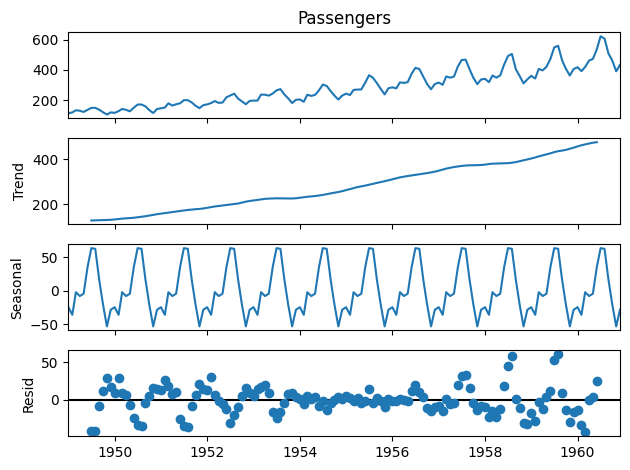

In [ ]:
# Plot the decomposition for additive series

decomposition_plot_add = seasonal_decompose(data['Passengers'], model='additive')
decomposition_plot_add.plot()
plt.show()

#ADFuller Test

In [ ]:
# ADF test

def adf_test(series):
    test_results = adfuller(series)

    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])

adf_test(data["Passengers"])

ADF Statistic:  0.8153688792060498
P-Value:  0.991880243437641


#Boxcox Transformation

In [ ]:
# Make the target variance stationary

data['Passengers_Boxcox'], lam = boxcox(data['Passengers'])

#Plotting Graph after Boxcox Transformation

In [ ]:
# Plot the box-cox passenger data

data.index = pd.to_datetime(data.index)

# Plot the data

fig = px.line(data, x=data.index, y='Passengers_Boxcox', labels=({'Passengers': 'Passengers_Boxcox', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18), title_text='Airline Passengers Boxcox Transformation', width=800, title_x=0.5, height=400)

fig.show()


In [ ]:
adf_test(data['Passengers_Boxcox'])

ADF Statistic:  -1.3260711769488467
P-Value:  0.6171619357969327


# Differencing

In [ ]:
# Difference the data
data["Passenger_diff"] = data["Passengers_Boxcox"].diff()
data.head()

,Passengers,Passengers_Boxcox,Passenger_diff
Month,,,
1949-01-01,112,6.827488,NaN
1949-02-01,118,6.932820,0.105332
1949-03-01,132,7.161889,0.229069
1949-04-01,129,7.114609,-0.047281
1949-05-01,121,6.983785,-0.130824


In [ ]:
data.dropna(inplace=True)
data.head()

,Passengers,Passengers_Boxcox,Passenger_diff
Month,,,
1949-02-01,118,6.932820,0.105332
1949-03-01,132,7.161889,0.229069
1949-04-01,129,7.114609,-0.047281
1949-05-01,121,6.983785,-0.130824
1949-06-01,135,7.208263,0.224478


#Plotting Graph after differentiating

In [ ]:
# Plot the box-cox-diff passenger data

data.index = pd.to_datetime(data.index)

# Plot the data

fig = px.line(data, x=data.index, y='Passenger_diff', labels=({'Passengers': 'Passengers_Boxcox_diff', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18), title_text='Airline Passengers Boxcox Transformation', width=800, title_x=0.5, height=400)

fig.show()

In [ ]:
adf_test(data['Passenger_diff'])

ADF Statistic:  -2.871707432314742
P-Value:  0.048738345775861384


# Plotting ACF & PACF Graph

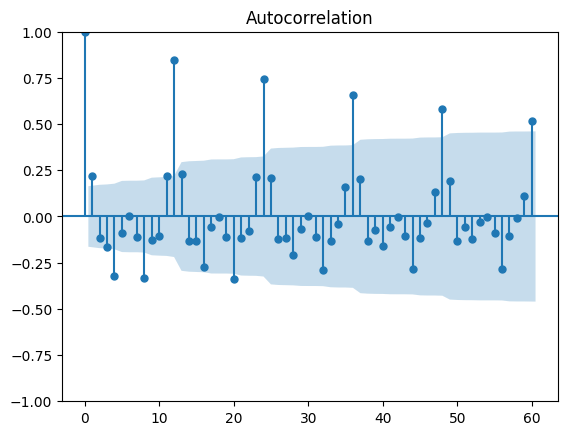

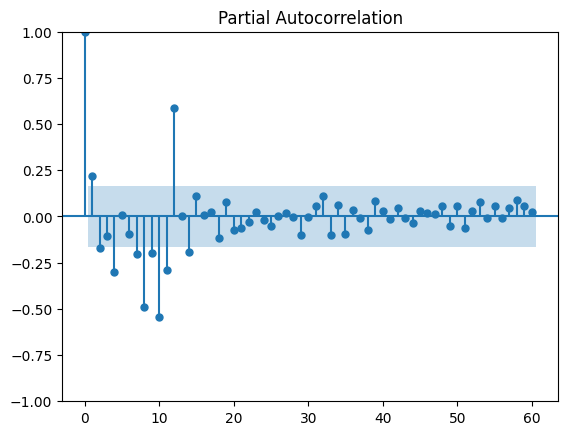

In [ ]:
plot_acf(data['Passenger_diff'], lags= 60)
plot_pacf(data['Passenger_diff'], lags= 60)
plt.show()

#ARIMA -> AutoRegression Integrated Moving Average

AR -> AutoRegression       (order of p  or the lags)


Integrated -> Differencing  (order of d or differencing)


MA -> Moving Average  (order of q or errors)


ARIMA (p, d, q=0) = AR


ARIMA (p=0, d=0, q) = MA

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,Month,Passengers,Passengers_Boxcox,Passenger_diff
0,1949-02-01,118,6.932820,0.105332
1,1949-03-01,132,7.161889,0.229069
2,1949-04-01,129,7.114609,-0.047281
3,1949-05-01,121,6.983785,-0.130824
4,1949-06-01,135,7.208263,0.224478


In [ ]:
# Split train and test

train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

# Build ARIMA model and inverse the boxcox

model_ARIMA = ARIMA(train['Passengers_Boxcox'], order=(12, 1, 12)).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
len(test)

28

In [ ]:
boxcox_forecasts = model_ARIMA.forecast(len(test))
forecasts_ARIMA = inv_boxcox(boxcox_forecasts, lam)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train['Month'], y=train['Passengers'], name='Train'))

fig.add_trace(go.Scatter(x=test['Month'], y=test['Passengers'], name='Test'))

fig.add_trace(go.Scatter(x=test['Month'], y=forecasts_ARIMA, name='Forecast'))

fig.update_layout(template="simple_white", font=dict(size=18), title_text='ARIMA',
                  width=800, title_x=0.5, height=400, xaxis_title='Date',
                  yaxis_title='Passenger Volume')

# Evaluation using AIC and BIC

#### Lowest scores are better

In [ ]:
# AIC score of ARIMA model

model_ARIMA.aic

-180.35786362258548

In [ ]:
# BIC score of ARIMA model

model_ARIMA.bic

-111.95290241272309

#SARIMA

In [ ]:
# SARIMA Model

model_SARIMA = SARIMAX(train['Passengers_Boxcox'], order=(2, 1, 2), seasonal_order=(1, 1, 3, 12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
len(test)

28

In [ ]:
boxcox_forecasts = model_SARIMA.forecast(len(test))
forecasts_SARIMA = inv_boxcox(boxcox_forecasts, lam)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train['Month'], y=train['Passengers'], name='Train'))

fig.add_trace(go.Scatter(x=test['Month'], y=test['Passengers'], name='Test'))

fig.add_trace(go.Scatter(x=test['Month'], y=forecasts_SARIMA, name='Forecast'))

fig.update_layout(template="simple_white", font=dict(size=18), title_text='SARIMA',
                  width=800, title_x=0.5, height=400, xaxis_title='Date',
                  yaxis_title='Passenger Volume')

# Evaluation using AIC and BIC

#### Lowest scores are better

In [ ]:
# AIC score of ARIMA model

model_SARIMA.aic

-203.37864293470764

In [ ]:
# BIC score of ARIMA model

model_SARIMA.bic

-179.7538876151492

In [ ]:
# SARIMA score is better than ARIMA hence, seosonality brings better score

# AUTO ARIMA


In [ ]:
# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

In [ ]:
#AUTO_ARIMA model

model_AUTO_ARIMA = auto_arima(train["Passengers_Boxcox"], trace=True, seasonal= True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-207.424, Time=2.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-114.231, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-205.793, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-176.882, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=55.011, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-213.015, Time=1.47 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-190.701, Time=0.51 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-211.017, Time=10.74 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-206.496, Time=3.35 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-209.119, Time=6.48 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-214.450, Time=1.11 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-190.682, Time=0.15 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-209.833, Time=1.63 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-212.446, Time=2.77 sec
 ARIMA(1,0,2)(1,1,0)

In [ ]:
boxcox_forecasts = model_AUTO_ARIMA.predict(len(test))
forecasts_AUTO_ARIMA = inv_boxcox(boxcox_forecasts, lam)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train['Month'], y=train['Passengers'], name='Train'))

fig.add_trace(go.Scatter(x=test['Month'], y=test['Passengers'], name='Test'))

fig.add_trace(go.Scatter(x=test['Month'], y=forecasts_AUTO_ARIMA, name='Forecast'))

fig.update_layout(template="simple_white", font=dict(size=18), title_text= 'AUTO_ARIMA',
                  width=1000, title_x=0.5, height=400, xaxis_title='Date',
                  yaxis_title='Passenger Volume')
fig.show()

In [ ]:
# Auto-ARIMA fits well with model:  ARIMA(1,0,2)(0,1,1)[12]
# p = 1
# d = 0
# q = 2
# P = 0
# D = 1
# Q = 1
# M = 12